<a href="https://colab.research.google.com/github/wsilveira-splunk/projeto_final_ciencia_dados_02_2020/blob/master/projeto_final_ciencia_dados_02_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Precificação para Geração Distribuída na Rede de Distribuição de Energia**

## Descrição:
O modelo utilizado atualmente para a Geração Distribuída (geradores instalados nas redes de distribuição) não abrange os impactos que esses geradores causam na rede, tanto os bons quanto os ruins, não diferenciando a tarifa paga por estes (todos pagam a mesma tarifa independentemente da localização). O modelo locacional é construído para capturar boa parte desses impactos e, por isso é o utilizado como exemplo a ser seguido para criar uma forma de precificação justa para a geração distribuída e para a rede.

O objetivo deste trabalho é propor um modelo de precificação para geração distribuída para o sistema de distribuição baseado no modelo existente de precificação do sistema de transmissão, especificamente utilizando o modelo da parcela locacional, utilizado no cálculo da tarifa de uso do sistema de transmissão, como referência.





Clone Git Repo if it is not already cloned.

In [1]:
%%bash

cd /content/

if [ -d "projeto_final_ciencia_dados_02_2020" ]; then
    cd projeto_final_ciencia_dados_02_2020
    git pull origin master
    cd -
else
  git clone https://github.com/wsilveira-splunk/projeto_final_ciencia_dados_02_2020.git
fi

Already up to date.
/content


From https://github.com/wsilveira-splunk/projeto_final_ciencia_dados_02_2020
 * branch            master     -> FETCH_HEAD


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
at_cemig_path = r'projeto_final_ciencia_dados_02_2020/dados/Geradores_at_cemig.xlsx'

In [4]:
df_at_cemig = pd.read_excel(at_cemig_path)
df_at_cemig.head()

,MUN,SUB,BRR,CEP,TEN_FORN,SIT_ATIV,POT_INST,POT_CONT,DEM_MÉDIA_P,DEM_MÉDIA_F,ENERGIA_MÉDIA_P,ENERGIA_MÉDIA_F
0,3121258,11048462,DELTA,38108000,94,AT,108400.00,108400.00,99644.750000,99644.750000,2.838814e+07,2.076111e+07
1,3136306,1726735,AREA RURAL,38770000,94,AT,32608.69,32608.69,27500.000000,27500.000000,2.586648e+07,1.881045e+07
2,3130705,200233514,AREA URBANA,38490000,94,AT,438818.47,438818.47,403713.000000,403713.000000,2.018565e+07,1.648495e+07
3,3127107,1726688,AREA RURAL,38200000,94,AT,52129.34,52129.34,23417.250000,23417.250000,1.418815e+07,8.604559e+06
4,3103751,1726567,AREA RURAL,38465000,82,AT,32479.34,32479.34,24888.333333,24888.333333,1.333508e+07,8.675895e+06


In [5]:
columns = ['POT_INST', 'POT_CONT', 'DEM_MÉDIA_P', 'DEM_MÉDIA_F', 'ENERGIA_MÉDIA_P', 'ENERGIA_MÉDIA_F']

def normalize(df, columns):
    result = df.copy()
    max_value = df[columns].max()
    min_value = df[columns].min()
    result[columns] = (df[columns] - min_value) / (max_value - min_value)
    return result

df_at_cemig_norm = normalize(df_at_cemig, columns)
df_at_cemig_norm.head()


,MUN,SUB,BRR,CEP,TEN_FORN,SIT_ATIV,POT_INST,POT_CONT,DEM_MÉDIA_P,DEM_MÉDIA_F,ENERGIA_MÉDIA_P,ENERGIA_MÉDIA_F
0,3121258,11048462,DELTA,38108000,94,AT,0.233799,0.233799,0.245736,0.245736,1.000000,1.000000
1,3136306,1726735,AREA RURAL,38770000,94,AT,0.058048,0.058048,0.066775,0.066775,0.853292,0.839538
2,3130705,200233514,AREA URBANA,38490000,94,AT,1.000000,1.000000,1.000000,1.000000,0.522784,0.648242
3,3127107,1726688,AREA RURAL,38200000,94,AT,0.103314,0.103314,0.056647,0.056647,0.173852,0.000000
4,3103751,1726567,AREA RURAL,38465000,82,AT,0.057748,0.057748,0.060297,0.060297,0.124221,0.005868


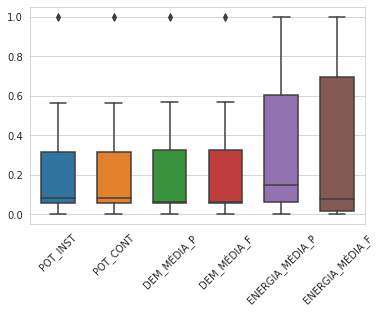

In [14]:
plt.figure(1)
plt.xticks(rotation=45)

sns.set_style("whitegrid")
ax = sns.boxplot(data=df_at_cemig_norm,
                 order=columns,
                 width=0.60)